In [7]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

# Timers
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# I/O Utilities
import requests
from bs4 import BeautifulSoup
import os
import sys
from IPython.display import display, HTML

In [8]:
# URL of the webpage to scrape
url = 'http://64.111.127.166/origin-destination/'

# Send an HTTP GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the webpage with Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("Failed to retrieve the webpage")


I can take a quick look at this webpage by rendering it directly into the jupyter notebook via `display(HTML(_))` from `IPython.display`. Note that I'm rendering the full page here because I know it's very small. If this were a larger, more complex webpage, then I would only render some piece of interest (e.g. a table) in a notebook.

In [9]:
display(HTML(str(soup)))

My target here is the set of .csv.gz (compressed .csv files) that contain hourly ridership totals. These are all links, thus are in `<a> </a>` tags, and have an `href` that ends in `.csv.gz`. The following captures links to that specification:

In [10]:
links = soup.find_all(
    # final all <a></a> content
    'a',
    # filter to only those links with href ending in .csv.gz
    href=lambda x: x and x.endswith(".csv.gz")
    )

I can capture the `href` for each of these pieces of html and see that I've captured  what I'm looking for.

In [11]:
files = [l.get('href') for l in links]
files

['date-hour-soo-dest-2011.csv.gz',
 'date-hour-soo-dest-2012.csv.gz',
 'date-hour-soo-dest-2013.csv.gz',
 'date-hour-soo-dest-2014.csv.gz',
 'date-hour-soo-dest-2015.csv.gz',
 'date-hour-soo-dest-2016.csv.gz',
 'date-hour-soo-dest-2017.csv.gz',
 'date-hour-soo-dest-2018.csv.gz',
 'date-hour-soo-dest-2019.csv.gz',
 'date-hour-soo-dest-2020.csv.gz',
 'date-hour-soo-dest-2021.csv.gz',
 'date-hour-soo-dest-2022.csv.gz',
 'date-hour-soo-dest-2023.csv.gz']

In [12]:
file_urls = [url + f for f in files]
file_urls

['http://64.111.127.166/origin-destination/date-hour-soo-dest-2011.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2012.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2013.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2014.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2015.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2016.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2017.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2018.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2019.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2020.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2021.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2022.csv.gz',
 'http://64.111.127.166/origin-destination/date-hour-soo-dest-2023.csv.gz']

In [13]:
counter = 1
total = 0
for f in file_urls:
    response = requests.head(f)
    # Retrieve the file size for each file
    file_size = int(response.headers.get('Content-Length', 0))
    # Keep track of the total file size
    total += file_size
    print(f"File {counter} size: {file_size} bytes ({round(file_size*10e-7, 2)} mega-bytes)")
    counter += 1

File 1 size: 35763624 bytes (35.76 mega-bytes)
File 2 size: 37086081 bytes (37.09 mega-bytes)
File 3 size: 36504603 bytes (36.5 mega-bytes)
File 4 size: 37607682 bytes (37.61 mega-bytes)
File 5 size: 38263683 bytes (38.26 mega-bytes)
File 6 size: 37896643 bytes (37.9 mega-bytes)
File 7 size: 37830997 bytes (37.83 mega-bytes)
File 8 size: 38627139 bytes (38.63 mega-bytes)
File 9 size: 38177159 bytes (38.18 mega-bytes)
File 10 size: 21415653 bytes (21.42 mega-bytes)
File 11 size: 24350926 bytes (24.35 mega-bytes)
File 12 size: 30546036 bytes (30.55 mega-bytes)
File 13 size: 27103436 bytes (27.1 mega-bytes)


In [14]:
print(f"Total size of data: {total*10e-7} mega-bytes")

Total size of data: 441.173662 mega-bytes


In [15]:
# Create the "data" folder if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

In [16]:
# Download and save the files
for url in tqdm(file_urls):
    filename = os.path.join('data', os.path.basename(url))
    if os.path.exists(filename):
        print(f"File already exists: {filename}")
    else:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as file:
                file.write(response.content)
        else:
            print(f"Failed to download: {url}")

100%|██████████| 13/13 [00:00<00:00, 2964.33it/s]

File already exists: data\date-hour-soo-dest-2011.csv.gz
File already exists: data\date-hour-soo-dest-2012.csv.gz
File already exists: data\date-hour-soo-dest-2013.csv.gz
File already exists: data\date-hour-soo-dest-2014.csv.gz
File already exists: data\date-hour-soo-dest-2015.csv.gz
File already exists: data\date-hour-soo-dest-2016.csv.gz
File already exists: data\date-hour-soo-dest-2017.csv.gz
File already exists: data\date-hour-soo-dest-2018.csv.gz
File already exists: data\date-hour-soo-dest-2019.csv.gz
File already exists: data\date-hour-soo-dest-2020.csv.gz
File already exists: data\date-hour-soo-dest-2021.csv.gz
File already exists: data\date-hour-soo-dest-2022.csv.gz
File already exists: data\date-hour-soo-dest-2023.csv.gz


In [17]:
# Create a .gitignore file
gitignore_content = "data/\n"  # Content to exclude the "data" folder

with open('.gitignore', 'w') as gitignore_file:
    gitignore_file.write(gitignore_content)

In [18]:
data_paths = ["data/" + f for f in files]
data_paths

['data/date-hour-soo-dest-2011.csv.gz',
 'data/date-hour-soo-dest-2012.csv.gz',
 'data/date-hour-soo-dest-2013.csv.gz',
 'data/date-hour-soo-dest-2014.csv.gz',
 'data/date-hour-soo-dest-2015.csv.gz',
 'data/date-hour-soo-dest-2016.csv.gz',
 'data/date-hour-soo-dest-2017.csv.gz',
 'data/date-hour-soo-dest-2018.csv.gz',
 'data/date-hour-soo-dest-2019.csv.gz',
 'data/date-hour-soo-dest-2020.csv.gz',
 'data/date-hour-soo-dest-2021.csv.gz',
 'data/date-hour-soo-dest-2022.csv.gz',
 'data/date-hour-soo-dest-2023.csv.gz']

In [19]:
df = dd.read_csv(data_paths, blocksize=None)

In [20]:
sys.getsizeof(df)*10e-7

4.8e-05

In [21]:
df.columns = ['Date', 'Hour', 'Start', 'End', 'Riders']

In [22]:
df

,Date,Hour,Start,End,Riders
npartitions=13,,,,,
,object,int64,object,object,int64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [23]:
ProgressBar().register()

In [24]:
df.shape[0].compute()

[                                        ] | 0% Completed |  0.2s

[########################################] | 100% Completed |  1min 35.6s


117029110

In [25]:
df.head()

[                                        ] | 0% Completed |  0.0s

[########################################] | 100% Completed |  5.5s


,Date,Hour,Start,End,Riders
0,2011-01-01,0,12TH,16TH,1
1,2011-01-01,0,12TH,24TH,3
2,2011-01-01,0,12TH,ASHB,2
3,2011-01-01,0,12TH,BAYF,5
4,2011-01-01,0,12TH,CIVC,3


### Subsets for In-Memory Analysis

In [26]:
df_stations = df.groupby(['Date', 'Start', 'End'])['Riders'].sum().compute()

[########################################] | 100% Completed |  2min 22.8s


In [43]:
sys.getsizeof(df_stations)*10e-7

118.923323

Condensing via grouping

In [27]:
df_rph = df.groupby(['Date', 'Hour'])['Riders'].sum().compute()

[########################################] | 100% Completed |  1min 12.9s


In [28]:
sys.getsizeof(df_rph)*10e-7

1.600422

In [29]:
df_rph = df_rph.reset_index()
df_rph.head()

,Date,Hour,Riders
0,2011-01-01,0,5174
1,2011-01-01,1,15479
2,2011-01-01,2,11055
3,2011-01-01,3,5592
4,2011-01-01,4,795


In [30]:
df_rph.shape

(104896, 3)

In [31]:
df_rph['Date'] = pd.to_datetime(df_rph['Date'], format="%Y-%m-%d")
df_rph['Hour_12'] = pd.to_datetime(df_rph['Hour'], format='%H').dt.strftime('%I:%M %p')
df_rph['Hour_12'] = df_rph['Hour_12'].str.replace(":00 ", "\n").str.strip("0")
df_rph['day_of_week'] = df_rph['Date'].dt.day_name()
df_rph['Weekend'] = df_rph['day_of_week'].isin(['Saturday', 'Sunday'])

In [32]:
df_rph.head()

,Date,Hour,Riders,Hour_12,day_of_week,Weekend
0,2011-01-01,0,5174,12\nAM,Saturday,True
1,2011-01-01,1,15479,1\nAM,Saturday,True
2,2011-01-01,2,11055,2\nAM,Saturday,True
3,2011-01-01,3,5592,3\nAM,Saturday,True
4,2011-01-01,4,795,4\nAM,Saturday,True


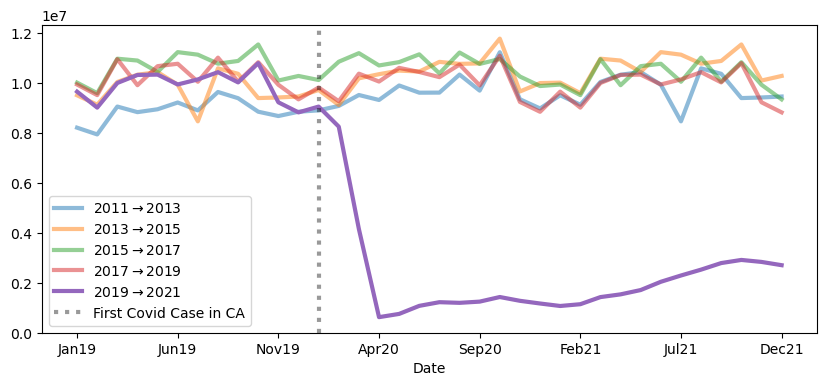

In [33]:
df_rph_d = df_rph.set_index("Date")

fig, ax = plt.subplots(figsize=(10, 4))
every_two = df_rph_d.index.year.unique()[::2][:-1]
labs = (
    df_rph_d.loc[str(every_two[-2]):str(every_two[-1])].resample("M")['Riders'].sum().index.month_name().str[:3] +
    df_rph_d.loc[str(every_two[-2]):str(every_two[-1])].resample("M")['Riders'].sum().index.year.astype(str).str[-2:]
    )

for i in range(len(every_two)-1):
    a = 1 if (every_two[i+1] == every_two[-1]) else .5
    subset = df_rph_d.loc[str(every_two[i]):str(every_two[i+1])]
    subset_time_series = subset.resample("M")['Riders'].sum().reset_index().set_index(labs)['Riders']
    subset_time_series.plot(linewidth=3,
                                                                                      ax=ax,
                                                                                      alpha=a,
                                                                                      label=fr"${every_two[i]} \rightarrow {every_two[i+1]}$")
ax.set_ylim(0)
ax.axvline(np.where(subset_time_series.index == 'Jan20'),
           linestyle=":",
           label="First Covid Case in CA",
           color="black",
           linewidth=3,
           alpha=.4)
ax.legend();

In [34]:
days = df_rph['day_of_week'].unique()
colors = sns.color_palette("tab10")
colormap = {}
for d, c in zip(days, colors[:len(days)]):
    colormap[d] = c

In [35]:
colormap

{'Saturday': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Sunday': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Monday': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Tuesday': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Wednesday': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Thursday': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Friday': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

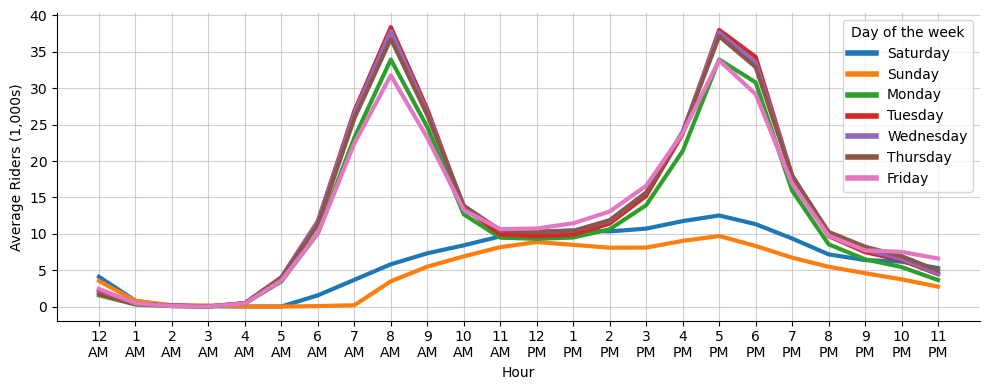

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(top=True, ax=ax)
sns.set_palette("PuBuGn_d")
g = sns.lineplot(
    data=df_rph.assign(riders_k = lambda x: x['Riders']/1000),
    x='Hour_12',
    y='riders_k',
    hue='day_of_week',
    palette=colormap,
    linewidth=3,
    estimator='mean',
    errorbar=None,
    ax=ax)
ax.set(
    ylabel="Average Riders (1,000s)",
    xlabel="Hour")
legend = ax.get_legend()
legend.set_title("Day of the week")
for line in legend.get_lines():
    line.set_linewidth(4.0)

ax.grid(alpha=.6)
fig.tight_layout()

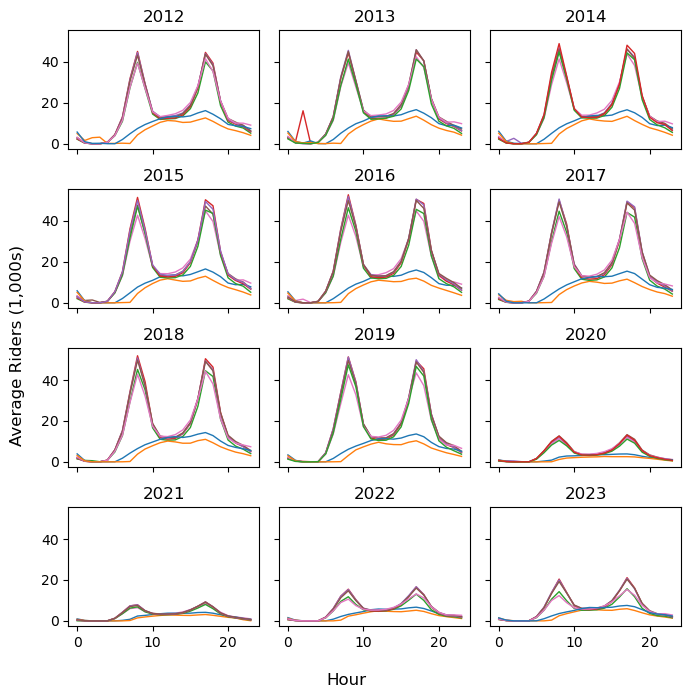

In [37]:
years = df_rph['Date'].dt.year.unique()[1:]
years = years.reshape(4, 3)
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(7, 7))

for m in range(years.shape[0]):
    for n in range(years.shape[1]):
        year = years[m, n]
        subset = df_rph[df_rph['Date'].dt.year == year]
        sns.lineplot(
            data=subset.assign(riders_k = lambda x: x['Riders']/1000),
            x='Hour',
            y='riders_k',
            hue='day_of_week',
            palette=colormap,
            linewidth=1,
            legend=False,
            estimator='mean',
            errorbar=None,
            ax=axes[m, n])
        axes[m, n].set(ylabel=None, xlabel=None, title=year) 
        
fig.supxlabel("Hour")
fig.supylabel("Average Riders (1,000s)")      
fig.tight_layout()

In [38]:
weekday_load = (df_rph
                .groupby([
                    df_rph['Date'].dt.year,
                    df_rph['Date'].dt.month,
                    (df_rph['Hour'].isin([7, 8, 9, 16, 17, 18, 19])) &
                    ~df_rph['Weekend']]
                    )
                ['Riders']
                .sum()
                .unstack()
                .dropna(axis=0)
                .apply(lambda x: x[True]/(x[True]+x[False]), axis=1)
                .rename_axis(index=['Year', 'Month']))

In [39]:
weekday_load_vec = (
    weekday_load
    .reset_index()
    .set_index(
        pd.to_datetime(weekday_load.reset_index()['Year'].astype(str) +
                       "-" +
                       weekday_load.reset_index()['Month'].astype(str)
                       )) # Build a new Year-Month index
    [0].rename("Percent") # The series was, by default, named `0`. Here we rename to Percent
    .iloc[:-1] # Remove the most recent month, as it is typically unfinished
    )

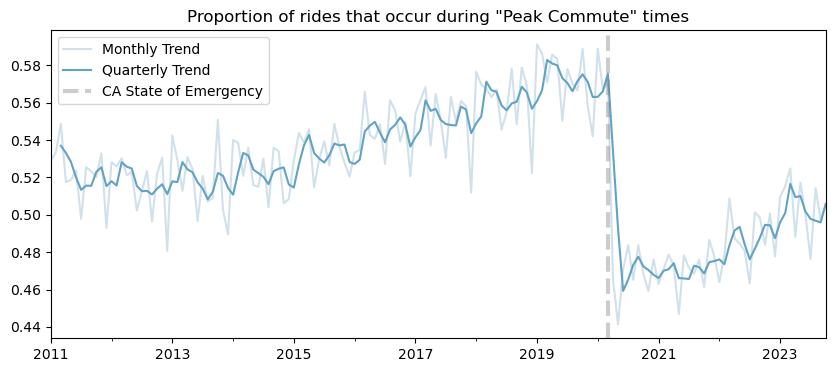

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
weekday_load_vec.plot(alpha=.4, ax=ax, label="Monthly Trend")
weekday_load_vec.rolling(3).mean().plot(ax=ax, label="Quarterly Trend")
ax.axvline("2020-03-04", linestyle="--", label="CA State of Emergency",  color="grey", linewidth=3, alpha=.4)
ax.set_title("Proportion of rides that occur during \"Peak Commute\" times")
ax.legend();